In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv


**Imports**

In [2]:
import pandas as pd
import numpy as np

For this milestone, only the booknow_visits.csv file is to be used. Using the show_date column, create new columns for day, month, year and dayofyear. Once the new columns are created, drop the show_date column

Split the data into X & y with the target variable audience_count as y and the remaining features as X. 

Split the dataset so that 20% of it is kept for validation. Ensure the split preserves the time series nature of the dataset. This data will be referred to as X_train, X_test and y_train, y_test

In [9]:
df=pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv")

In [10]:
df.head()

,book_theater_id,show_date,audience_count
0,book_00001,2023-01-13,50
1,book_00001,2023-01-14,64
2,book_00001,2023-01-15,58
3,book_00001,2023-01-16,44
4,book_00001,2023-01-18,12


In [11]:
df['show_date'] = pd.to_datetime(df['show_date'])

In [13]:
df = df.assign(
    day=df['show_date'].dt.day,
    month=df['show_date'].dt.month,
    year=df['show_date'].dt.year,
    dayofyear=df['show_date'].dt.dayofyear
)

In [14]:
df=df.drop(columns=["show_date"])

In [15]:
df.head()

,book_theater_id,audience_count,day,month,year,dayofyear
0,book_00001,50,13,1,2023,13
1,book_00001,64,14,1,2023,14
2,book_00001,58,15,1,2023,15
3,book_00001,44,16,1,2023,16
4,book_00001,12,18,1,2023,18


In [16]:
y=df["audience_count"]
df=df.drop(columns=["audience_count"])

In [20]:
df["book_theater_id"].unique()

826

In [21]:
x=df.copy()

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


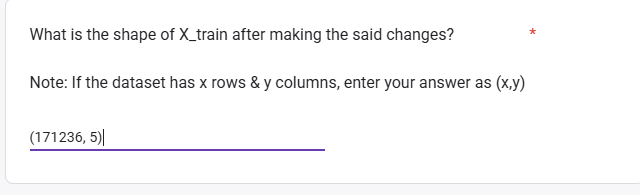

In [23]:
x_train.shape

(171236, 5)

In [25]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171236 entries, 142915 to 121958
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   book_theater_id  171236 non-null  object
 1   day              171236 non-null  int32 
 2   month            171236 non-null  int32 
 3   year             171236 non-null  int32 
 4   dayofyear        171236 non-null  int32 
dtypes: int32(4), object(1)
memory usage: 5.2+ MB


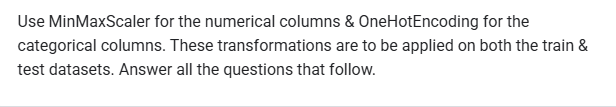

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ["day","month","year","dayofyear"]),
        ('cat', OneHotEncoder(sparse_output=False), ["book_theater_id"])
    ]
)

In [29]:
x_train=preprocessor.fit_transform(x_train)

In [30]:
x_test=preprocessor.transform(x_test)

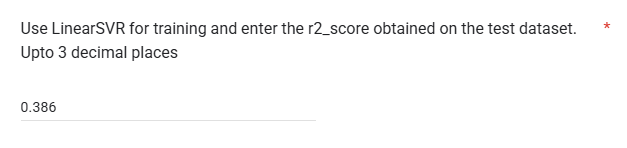

In [31]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score
lsvr=LinearSVR()
lsvr.fit(x_train,y_train)
y_pred=lsvr.predict(x_test)

In [32]:
score=r2_score(y_test,y_pred)
score

0.38647780600990556

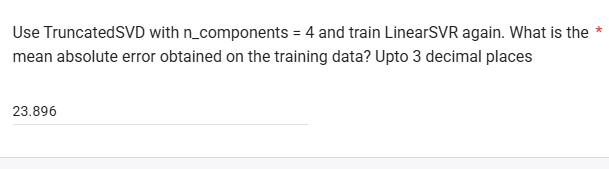

In [34]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=4, random_state=42)
x_train_reduced = svd.fit_transform(x_train)
x_test_reduced=svd.transform(x_test)
lsvr=LinearSVR()
lsvr.fit(x_train_reduced,y_train)
y_pred=lsvr.predict(x_train_reduced)

In [35]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_train,y_pred)
mae

23.896888685049102

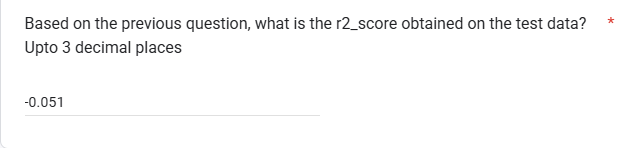

In [36]:
y_pred=lsvr.predict(x_test_reduced)
score=r2_score(y_test,y_pred)
score

-0.05140966391365054

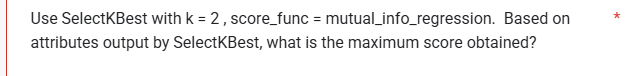

In [38]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression, k=2)
x_train_new = selector.fit_transform(x_train,y_train)

In [ ]:
selector.scores_.max()

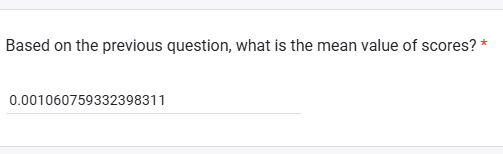

In [42]:
selector.scores_.mean()

0.001060759332398311